In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


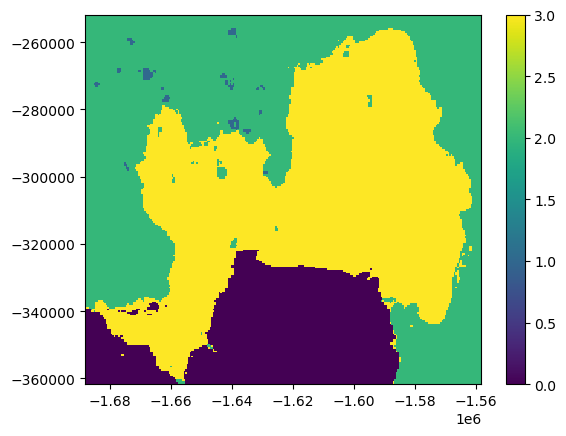

In [3]:
#Bedmachine 
#ds = xr.open_dataset("../data/BedMachineAntarctica_2020-07-15_v02.nc") #v2
ds = xr.open_dataset("../data/BedMachineAntarctica-v3.nc") #v3

#ds = ds.isel(x=slice(3445,3705),y=slice(7730,8065)) #CrossDots
#ds = ds.isel(x=slice(11800,11950),y=slice(7850,7950)) #Conger
ds = ds.isel(x=slice(3290,3550),y=slice(7170,7390)) #PIG

ds.to_netcdf("../input/PIG_bm3.nc")
ds
plt.pcolormesh(ds.x,ds.y,ds.mask)
plt.colorbar()

In [ ]:
#ISOMIP
ds = xr.open_dataset("../../data/isomip/Ocean2_input_geom_v1.01.nc")
ds['surface'] = ds['upperSurface']
ds['thickness'] = ds['upperSurface']-ds['lowerSurface']
ds['bed'] = ds['bedrockTopography']
ds['mask'] = 0.*ds['upperSurface']
ds['mask'] = xr.where(ds['groundedMask'],2,ds['mask'])
ds['mask'] = xr.where(ds['floatingMask'],3,ds['mask'])
ds = ds.drop_vars(['upperSurface','lowerSurface','bedrockTopography','floatingMask','groundedMask','openOceanMask'])
ds.to_netcdf("../input/Ocean2.nc")
ds